In [2]:
print("hello to check")

hello to check


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [4]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


In [5]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape , y_train.shape , X_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

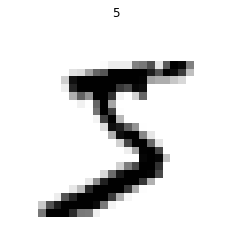

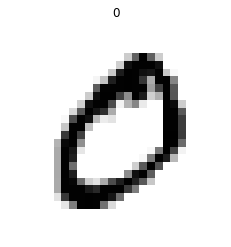

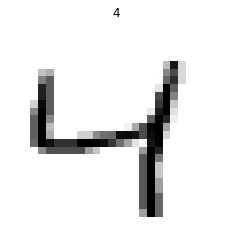

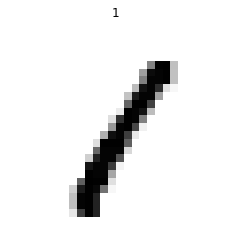

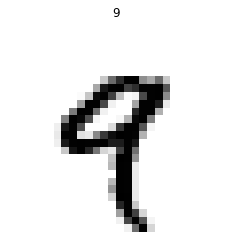

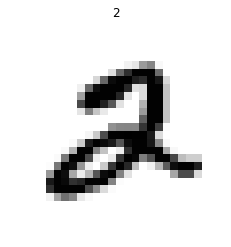

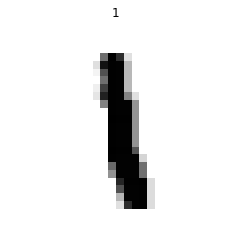

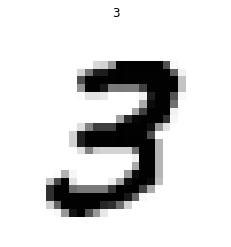

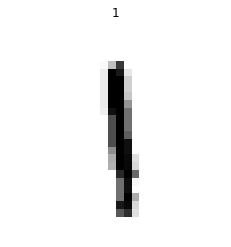

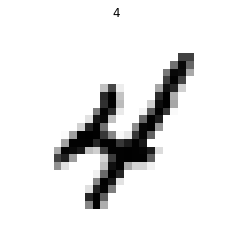

In [7]:
for i in range(10):
    plot_input_img(i)


In [8]:
#pre process data
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
#reshape or expand the dimentions of images to (28,28)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [9]:
#convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [32]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [33]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint
#earlystopping
es= EarlyStopping(monitor='accuracy', min_delta=0.01,patience=4, verbose=1 )
#model check point
mc=ModelCheckpoint("./bestmodel.h5",monitor="accuracy",verbose=1,save_best_only=True)

cb = [es,mc]

In [34]:
#model train
his=model.fit(X_train, y_train , epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9993
Epoch 1: accuracy improved from -inf to 0.99931, saving model to .\bestmodel.h5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0123 - val_accuracy: 0.9924
Epoch 2/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9992
Epoch 2: accuracy did not improve from 0.99931
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.0122 - val_accuracy: 0.9923
Epoch 3/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 3: accuracy improved from 0.99931 to 0.99945, saving model to .\bestmodel.h5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0123 - val_accuracy: 0.9923
Epoch 4/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.99

In [35]:
model_S=keras.models.load_model("D://programming//python for ml//New folder//bestmodel.h5")

In [36]:
score = model_S.evaluate(X_test,y_test)
print(f",odel accuracy is {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9928
,odel accuracy is 0.9927999973297119
